# Chapter 1: Data Exploration and Cleaning

## Learning Aims:

- first **look** at the dataset for the case study project that will form the core of the book
- Look at **quality** assurance checks that data needs to be put through before model building
- Understand how to perform data **cleaning** using pandas

i.e.

learn:
- exploratory data analysis, 
- quality assurance, and 
- data cleaning.

## Introduction

- **Data viz** ==> Learn **current state** of business relative to past
- **ML** ==> Prediction of **future state**
- practical skills necessary for success:
    - inquisitiveness when examining data
    - communication with the client

### Indexing Slicing Operator

In [1]:
example_list = list(range(1,6))
example_list

[1, 2, 3, 4, 5]

In [3]:
example_list[0]

1

In [4]:
example_list[-1], example_list[-2]

(5, 4)

In [5]:
example_list[:3]

[1, 2, 3]

In [6]:
example_list[0:3]

[1, 2, 3]

In [7]:
example_list[0] = 'a string'
example_list

['a string', 2, 3, 4, 5]

**NOTE**: 
1. `range()` includes the starting point, but not the end point
2. *slicing*: Again includes the starting point, but not the end point

## Types of Data Science Problems

- data is typically organized in a tabular structure, with features and a response variable
- For example, if you want to predict the price of a house based on 
    - some characteristics about it, such as area and number of bedrooms, these attributes would be considered the **features** and 
    - the price of the house would be the **response** variable.

### Supervised Learning

When we are making predictions using labeled data. 

#### Regression Problem

Predicting a continuous, numerical target using labeled data.

#### Classification Problem

Qualitative predictions into categories like *yes* and *no*, or *cat-dog-bird* etc.

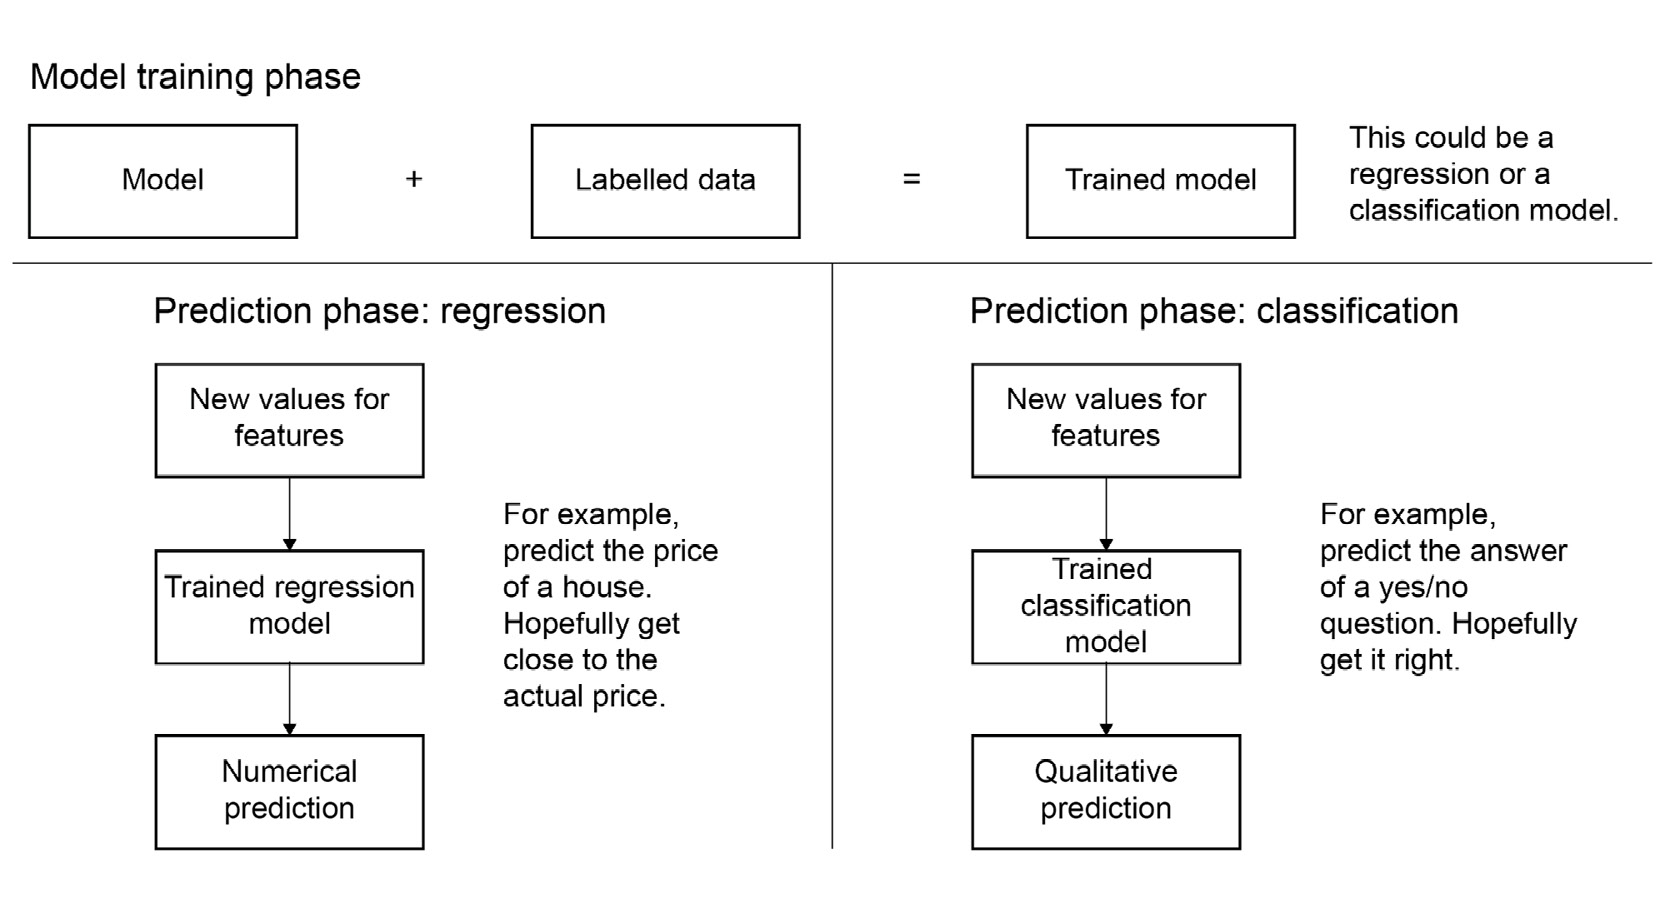

### Unsupervised Learning

- more open-ended
- trying to find some sort of structure in a dataset with no labels

## Loading data

Orignal link for data: <https://packt.link/wensZ>

Dowloaded to the `Data` folder in the repository

In [12]:
import pandas as pd

from pathlib import Path

data_directory = Path('.') / 'Data'
data_directory

PosixPath('Data')

In [14]:
df = pd.read_excel(str(data_directory/'default_of_credit_card_clients__courseware_version_1_21_19.xls'))
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.shape

(30000, 25)

## Data Exploration

**Data dictionary**: Document that explains what the data owner thinks should be in the data, such as the definitions of the column labels.

A very important step in data exploration is: *checking the SQL/api query output matches our data dictionary.*

### The Business Problem

- Client: Credit Card company
- Dataset: 
    - demographic and recent financial data 
    - over past 6 months
    - of 30,000 account holders
    - label: whether after the 6-months period the account owner defaulted or not
- Goal: Develop a model that predicts the probability of an account default.

### The Steps

Purpose of Data Exploration:
- Look through the data
    - Directly: shape, null values, columns, data types etc `pd.info()`
    - Indirectly: statistics, graphs

- Check quality of data:
    - Colomn names are same as dictionary
    - Appropriate size
    - Uniquness of certain entrries like id
    - Data values in the correct range: like wrong state name or negative age
    - 

In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

dataset information that was given to us by the client:

**LIMIT_BAL**: Amount of credit provided (in New Taiwanese (NT) dollar) including individual consumer credit and the family (supplementary) credit.

**SEX**: Gender (1 = male; 2 = female).

Note

We will not be using the gender data to decide credit-worthiness owing to ethical considerations.

**EDUCATION**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others).

**AGE**: Age (year).

**PAY_1**–**PAY_6**: A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns.

**PAY_1** represents the repayment status in September; **PAY_2** is the repayment status in August; and so on up to **PAY_6**, which represents the repayment status in April.

The measurement scale for the repayment status is as follows: -1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months; and so on up to 8 = payment delay for 8 months; 9 = payment delay for 9 months and above.

**BILL_AMT1**–**BILL_AMT6**: Bill statement amount (in NT dollar).

**BILL_AMT1** represents the bill statement amount in September; **BILL_AMT2** represents the bill statement amount in August; and so on up to **BILL_AMT6**, which represents the bill statement amount in April.

**PAY_AMT1**–**PAY_AMT6**: Amount of previous payment (NT dollar). **PAY_AMT1** represents the amount paid in September; **PAY_AMT2** represents the amount paid in August; and so on up to **PAY_AMT6**, which represents the amount paid in April.

In [18]:
df['ID'].nunique()

29687

In [19]:
df.shape

(30000, 25)

The number of unique id's is less than the number of rows in the dataset. Meaning ID is not a unique identifier in the data.

This can imply that:
1. IDs represent owners and a sigle owner might have multiple credit cards.
2. Data might have some errors
3. Algorithmic error in id specification

etc.